In [160]:
##########################################
import pandas as pd
import numpy as np
from PIL import Image  # For loading images
import os  # For file path operations
from tensorflow.keras.models import Model
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import L2,L1,L1L2
from tensorflow.keras import models, layers, optimizers

In [161]:
data_training = '/kaggle/input/retinal-disease-classification/Training_Set/Training_Set/Training'  # Adjust the path if needed
data_testing  = '/kaggle/input/retinal-disease-classification/Test_Set/Test_Set/Test'

In [162]:
#training
images = []

In [163]:
 images_testing = []

In [164]:
#training
image_size = (224, 224)
images_array = []
for filename in os.listdir(data_training):
    img_path = os.path.join(data_training, filename)
    img = Image.open(img_path)
    img = img.convert('RGB')
    img = img.resize(image_size)  # Resize to consistent size
    img_array = np.array(img)  # Convert to NumPy array
    images_array.append(img_array)

images_array = np.array(images_array)  # Final array creation

In [165]:
images_array2 = []
for filename in os.listdir(data_testing):
    img_path = os.path.join(data_testing, filename)
    img = Image.open(img_path)
    img = img.convert('RGB')
    img = img.resize(image_size)  # Resize to consistent size
    img_array_ts = np.array(img)  # Convert to NumPy array
    images_array2.append(img_array_ts)

images_array2 = np.array(images_array2)  # Final array creation

In [166]:
 labels_df = pd.read_csv('/kaggle/input/retinal-disease-classification/Training_Set/Training_Set/RFMiD_Training_Labels.csv')

In [167]:
labels_df_ts = pd.read_csv('/kaggle/input/retinal-disease-classification/Test_Set/Test_Set/RFMiD_Testing_Labels.csv')

In [168]:
#training
images_resized = [Image.fromarray(img).resize(image_size) for img in images_array]

# Convert the list of images to a NumPy array
images_resized_array = np.array([np.array(img) for img in images_resized])

In [169]:
images_resized_ts = [Image.fromarray(img).resize(image_size) for img in images_array2]

# Convert the list of images to a NumPy array
images_resized_array_ts = np.array([np.array(img) for img in images_resized_ts])

In [170]:
#training
print("Number of loaded images:", len(images_array))

Number of loaded images: 1920


In [171]:
print("Number of loaded images:", len(images_array2))

Number of loaded images: 640


In [172]:
#training
print("Image shape:", images_array[0].shape)

Image shape: (224, 224, 3)


In [173]:
print("Image shape:", images_array2[0].shape)

Image shape: (224, 224, 3)


In [174]:
#training
print("Labels DataFrame:\n", labels_df.head())  # Display first few rows

Labels DataFrame:
    ID  Disease_Risk  DR  ARMD  MH  DN  MYA  BRVO  TSLN  ERM  ...  CME  PTCR  \
0   1             1   1     0   0   0    0     0     0    0  ...    0     0   
1   2             1   1     0   0   0    0     0     0    0  ...    0     0   
2   3             1   1     0   0   0    0     0     0    0  ...    0     0   
3   4             1   0     0   1   0    0     0     0    0  ...    0     0   
4   5             1   1     0   0   0    0     0     0    0  ...    0     0   

   CF  VH  MCA  VS  BRAO  PLQ  HPED  CL  
0   0   0    0   0     0    0     0   0  
1   0   0    0   0     0    0     0   0  
2   0   0    0   0     0    0     0   0  
3   0   0    0   0     0    0     0   0  
4   0   0    0   0     0    0     0   0  

[5 rows x 47 columns]


In [175]:
print("Labels DataFrame:\n", labels_df_ts.head())  # Display first few rows

Labels DataFrame:
    ID  Disease_Risk  DR  ARMD  MH  DN  MYA  BRVO  TSLN  ERM  ...  CME  PTCR  \
0   1             1   1     0   0   0    0     0     1    0  ...    0     0   
1   2             1   1     0   0   0    0     1     0    0  ...    0     0   
2   3             1   1     0   0   0    0     0     0    0  ...    0     0   
3   4             1   0     0   0   0    0     0     0    0  ...    0     0   
4   5             1   0     0   0   0    0     0     0    0  ...    0     0   

   CF  VH  MCA  VS  BRAO  PLQ  HPED  CL  
0   0   0    0   0     0    0     0   0  
1   0   0    0   0     0    0     0   0  
2   0   0    0   0     0    0     0   0  
3   0   0    0   0     0    0     0   0  
4   0   0    0   0     0    0     0   0  

[5 rows x 47 columns]


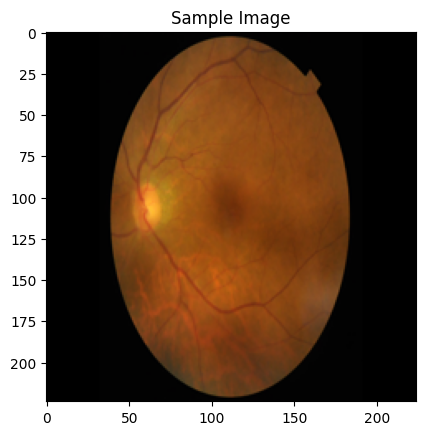

In [176]:
#training
import matplotlib.pyplot as plt

plt.imshow(images_array[0])
plt.title("Sample Image")
plt.show()

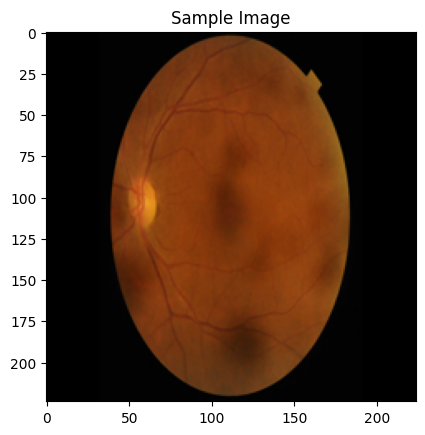

In [177]:
import matplotlib.pyplot as plt

plt.imshow(images_array2[2])
plt.title("Sample Image")
plt.show()

In [178]:
#training
print("Label counts:\n", labels_df['Disease_Risk'].value_counts())

Label counts:
 Disease_Risk
1    1519
0     401
Name: count, dtype: int64


In [179]:
print("Label counts:\n", labels_df_ts['Disease_Risk'].value_counts())


Label counts:
 Disease_Risk
1    506
0    134
Name: count, dtype: int64


array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'Disease_Risk'}>,
        <Axes: title={'center': 'DR'}>, <Axes: title={'center': 'ARMD'}>,
        <Axes: title={'center': 'MH'}>, <Axes: title={'center': 'DN'}>,
        <Axes: title={'center': 'MYA'}>],
       [<Axes: title={'center': 'BRVO'}>,
        <Axes: title={'center': 'TSLN'}>,
        <Axes: title={'center': 'ERM'}>, <Axes: title={'center': 'LS'}>,
        <Axes: title={'center': 'MS'}>, <Axes: title={'center': 'CSR'}>,
        <Axes: title={'center': 'ODC'}>],
       [<Axes: title={'center': 'CRVO'}>, <Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'AH'}>, <Axes: title={'center': 'ODP'}>,
        <Axes: title={'center': 'ODE'}>, <Axes: title={'center': 'ST'}>,
        <Axes: title={'center': 'AION'}>],
       [<Axes: title={'center': 'PT'}>, <Axes: title={'center': 'RT'}>,
        <Axes: title={'center': 'RS'}>, <Axes: title={'center': 'CRS'}>,
        <Axes: title={'center': 'EDN'}>,
 

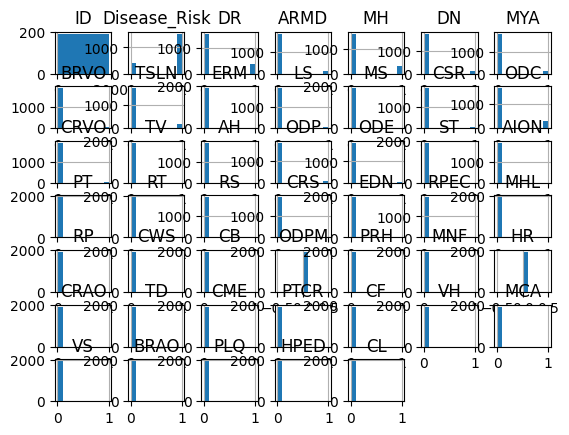

In [180]:
#training
labels_df.hist()  # Histogram of label values

<Axes: >

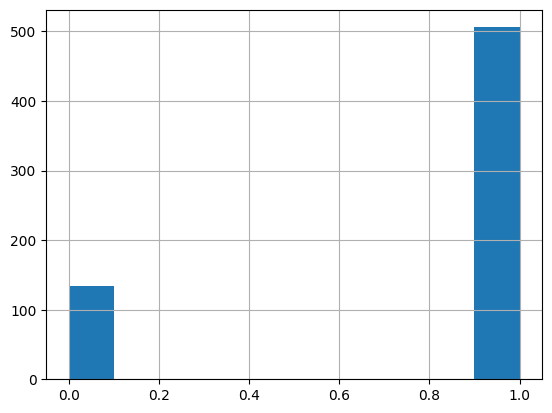

In [181]:
labels_df_ts['Disease_Risk'].hist()  # Histogram of label values

In [182]:
#training
print("Missing values in images_array:", np.any(np.isnan(images_array)))
print("Missing values in labels_df:", labels_df.isnull().values.any())

Missing values in images_array: False
Missing values in labels_df: False


In [183]:
#training
print("Images array data type:", images_array.dtype)
print("Labels DataFrame data types:\n", labels_df.dtypes)

Images array data type: uint8
Labels DataFrame data types:
 ID              int64
Disease_Risk    int64
DR              int64
ARMD            int64
MH              int64
DN              int64
MYA             int64
BRVO            int64
TSLN            int64
ERM             int64
LS              int64
MS              int64
CSR             int64
ODC             int64
CRVO            int64
TV              int64
AH              int64
ODP             int64
ODE             int64
ST              int64
AION            int64
PT              int64
RT              int64
RS              int64
CRS             int64
EDN             int64
RPEC            int64
MHL             int64
RP              int64
CWS             int64
CB              int64
ODPM            int64
PRH             int64
MNF             int64
HR              int64
CRAO            int64
TD              int64
CME             int64
PTCR            int64
CF              int64
VH              int64
MCA             int64
VS              

In [184]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [185]:
train_ds = preprocess_input(images_resized_array)

In [186]:
test_ds = preprocess_input(images_resized_array_ts)

In [187]:
train_ds.shape

(1920, 224, 224, 3)

In [188]:
#training
labels_df.values.shape

(1920, 47)

In [189]:
#training
#num_classes = labels_df['Disease_Risk'].nunique()
#print("Number of classes:", num_classes)

new_df = labels_df[['Disease_Risk', 'DR', 'ARMD']]

# ...

# Determine the number of classes
num_classes = new_df.nunique()

In [190]:
print("Number of classes:",num_classes )

Number of classes: Disease_Risk    2
DR              2
ARMD            2
dtype: int64


In [191]:
num_classes_ts = labels_df_ts['Disease_Risk'].nunique()
print("Number of classes:", num_classes_ts)


# ...

# Determine the number of classes
num_classes_ts = labels_df_ts.nunique()

Number of classes: 2


In [192]:
actual_num_classes = num_classes.iloc[0]
predictions = layers.Dense(actual_num_classes, activation='softmax')(x)


In [193]:
print(type(actual_num_classes))

<class 'numpy.int64'>


In [194]:
# Assuming 'new_df' contains the labels
labels_multi = new_df[['Disease_Risk', 'DR', 'ARMD']]

# Determine the number of classes
num_classes_multi = labels_multi.shape[1]

# Convert to one-hot encoding
labels_one_hot_multi = to_categorical(labels_multi, num_classes=num_classes_multi)

# ...

# Split the data into train and validation sets with shuffling
train_ds, val_ds, train_labels, val_labels = train_test_split(
    images_resized_array, labels_one_hot_multi, test_size=0.2, random_state=42, shuffle=True
)

In [195]:
#training
#num_classes = labels_df['Disease_Risk'].nunique()
#print("Number of classes:", num_classes)

new_df = labels_df[['Disease_Risk', 'DR', 'ARMD']]

# ...

# Determine the number of classes
num_classes = new_df.nunique()

# Create and compile the model
model = models.Sequential([
    # ... previous layers
    layers.Dense(2, activation='softmax')  # Output layer with the correct number of neurons
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Assuming you are using categorical crossentropy
    metrics=['accuracy']
)

# ...
#

In [196]:
# Extract the specified columns into a new dataframe
new_df = labels_df[['Disease_Risk', 'DR', 'ARMD']]
num_classes_ = new_df.nunique()

print("Number of classes:",num_classes )

Number of classes: Disease_Risk    2
DR              2
ARMD            2
dtype: int64


In [197]:
labels_one_hot = to_categorical(new_df,num_classes=3)


In [198]:
train_ds, val_ds, train_labels, val_labels = train_test_split(
    images_resized_array, labels_one_hot, test_size=0.2, random_state=42, shuffle=True
)

In [199]:
num_classes = new_df.nunique()

In [200]:
# Assuming 'new_df' contains the labels
labels_multi = new_df[['Disease_Risk', 'DR', 'ARMD']]

# Determine the number of classes
num_classes_multi = labels_multi.shape[1]

# Convert to one-hot encoding
labels_one_hot_multi = to_categorical(labels_multi, num_classes=num_classes_multi)

# ...

# Split the data into train and validation sets with shuffling
train_ds, val_ds, train_labels, val_labels = train_test_split(
    images_resized_array, labels_one_hot_multi, test_size=0.2, random_state=42, shuffle=True
)

In [201]:
train_labels = np.expand_dims(train_labels, axis=1)
val_labels = np.expand_dims(val_labels, axis=1)

In [202]:
train_labels.shape

(1536, 1, 3, 3)

In [203]:
train_ds.shape

(1536, 224, 224, 3)

In [204]:
labels_multi = new_df[['Disease_Risk', 'DR', 'ARMD']]

# Determine the number of unique values across all columns
num_classes_multi = len(np.unique(labels_multi))

# Convert to one-hot encoding
labels_one_hot_multi = to_categorical(labels_multi, num_classes=num_classes_multi)

# ...

# Split the data into train and validation sets with shuffling
train_ds, val_ds, train_labels, val_labels = train_test_split(
    images_resized_array, labels_one_hot_multi, test_size=0.2, random_state=42, shuffle=True
)

In [205]:
#training
# Creating the model
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=L2(0.001)), # Add regularization
    layers.Dense(64, activation='relu', kernel_regularizer=L2(0.001)), # Add a hidden layer
    Dropout(0.5), # Add dropout to reduce overfitting
    layers.Dense(2, activation='softmax') # Change to 'num_classes' if not binary classification
])

In [207]:
# Assuming 'new_df' contains the labels
labels_multi = new_df[['Disease_Risk', 'DR', 'ARMD']]

# Convert to one-hot encoding
labels_one_hot_multi = labels_multi  # No need for to_categorical, as the labels are already binary

# ...

# Split the data into train and validation sets with shuffling
train_ds, val_ds, train_labels, val_labels = train_test_split(
    images_resized_array, labels_one_hot_multi, test_size=0.2, random_state=42, shuffle=True
)

# ...

# Creating the model
model = models.Sequential([
    base_model,
   layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=L2(0.001)),
    layers.Dropout(0.7),
    layers.Dense(64, activation='relu', kernel_regularizer=L2(0.001)),
    layers.Dropout(0.7),
    layers.Dense(3, activation='sigmoid')  # Output layer with 3 neurons for multi-class classification
])

# ...

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# ...

# Train the model
history = model.fit(
    train_ds, train_labels,
    epochs=10,
    validation_data=(val_ds, val_labels),
    batch_size=32,
)

Epoch 1/10
48/48 [==============================] - 51s 354ms/step - loss: 1.0765 - accuracy: 0.8060 - val_loss: 1703.9161 - val_accuracy: 1.0000
Epoch 2/10
48/48 [==============================] - 16s 333ms/step - loss: 0.6350 - accuracy: 0.9264 - val_loss: 47.9371 - val_accuracy: 0.7474
Epoch 3/10
48/48 [==============================] - 16s 330ms/step - loss: 0.6078 - accuracy: 0.9674 - val_loss: 0.5981 - val_accuracy: 0.9922
Epoch 4/10
48/48 [==============================] - 16s 327ms/step - loss: 0.5715 - accuracy: 0.9909 - val_loss: 10.4970 - val_accuracy: 0.9740
Epoch 5/10
48/48 [==============================] - 16s 326ms/step - loss: 0.6151 - accuracy: 0.9844 - val_loss: 6.5752 - val_accuracy: 0.9922
Epoch 6/10
48/48 [==============================] - 16s 326ms/step - loss: 0.5550 - accuracy: 0.9961 - val_loss: 0.4932 - val_accuracy: 1.0000
Epoch 7/10
48/48 [==============================] - 16s 327ms/step - loss: 0.5519 - accuracy: 0.9967 - val_loss: 0.5543 - val_accuracy: 1

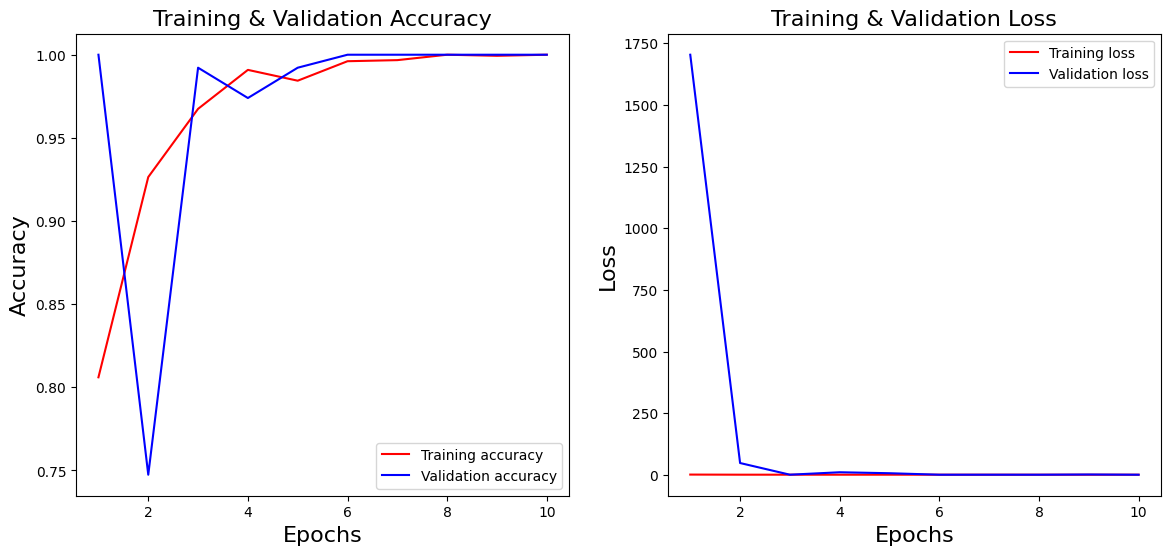

In [208]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))


# Plot the model accuracy vs Epochs
ax[0].plot(epochs, accuracy, 'r', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()


# Plot the loss vs Epochs
ax[1].plot(epochs, loss_values, 'r', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend();

In [209]:
# Assuming 'new_df_ts' contains the labels
new_df_ts = labels_df_ts[['Disease_Risk', 'DR', 'ARMD']]

labels_multi_ts = new_df_ts[['Disease_Risk', 'DR', 'ARMD']]

# Determine the number of classes
num_classes_multi_ts = labels_multi_ts.shape[1]

# Convert to one-hot encoding
#labels_one_hot_multi_ts = to_categorical(labels_multi_ts, num_classes=num_classes_multi_ts)
labels_one_hot_multi_ts = labels_multi_ts
# ...

In [210]:
test_loss, test_acc = model.evaluate(test_ds, labels_one_hot_multi_ts)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

predictions = model.predict(test_ds)
print(predictions)
print(np.argmax(np.round(predictions[0])))

20/20 [==============================] - 3s 95ms/step - loss: 0.5245 - accuracy: 1.0000
Test loss 0.5245221257209778
Test accuracy 1.0
20/20 [==============================] - 3s 88ms/step
[[0.7077734  0.2761273  0.15604874]
 [0.7077734  0.2761273  0.15604874]
 [0.7077734  0.2761273  0.15604874]
 ...
 [0.7077734  0.2761273  0.15604874]
 [0.7077734  0.2761273  0.15604874]
 [0.7077734  0.2761273  0.15604874]]
0


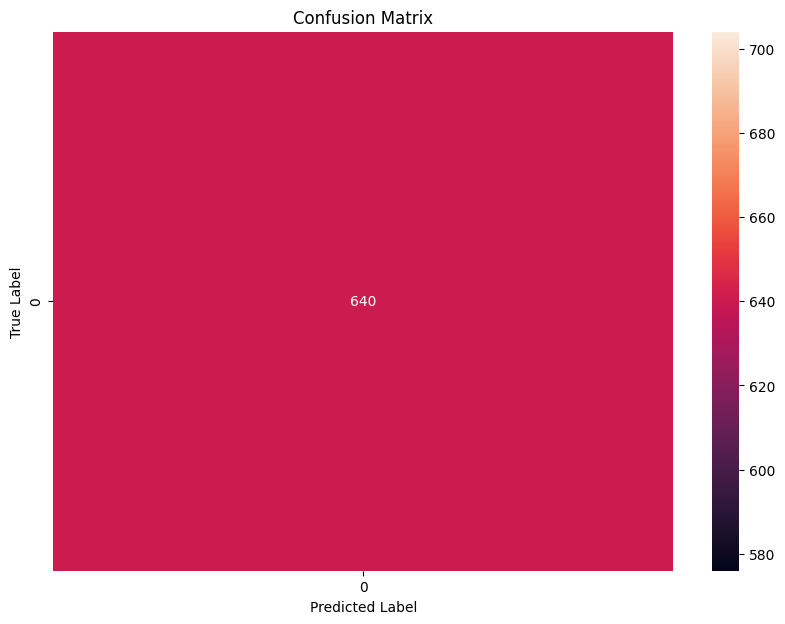

In [211]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the true labels
true_labels = np.argmax(labels_one_hot_multi_ts, axis=1)

# Convert the predicted probabilities to binary labels
predicted_labels = np.argmax(predictions, axis=1)

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()